In [11]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("D:\PythonProjects\SpotifyDataAnalis\Billionaires Statistics Dataset.csv")

df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


### Countries with the greatest amount of billionares

In [12]:
country_counts = df['country'].value_counts()
print(country_counts)


country
United States           754
China                   523
India                   157
Germany                 102
United Kingdom           82
                       ... 
Portugal                  1
Georgia                   1
Eswatini (Swaziland)      1
Uzbekistan                1
Armenia                   1
Name: count, Length: 78, dtype: int64


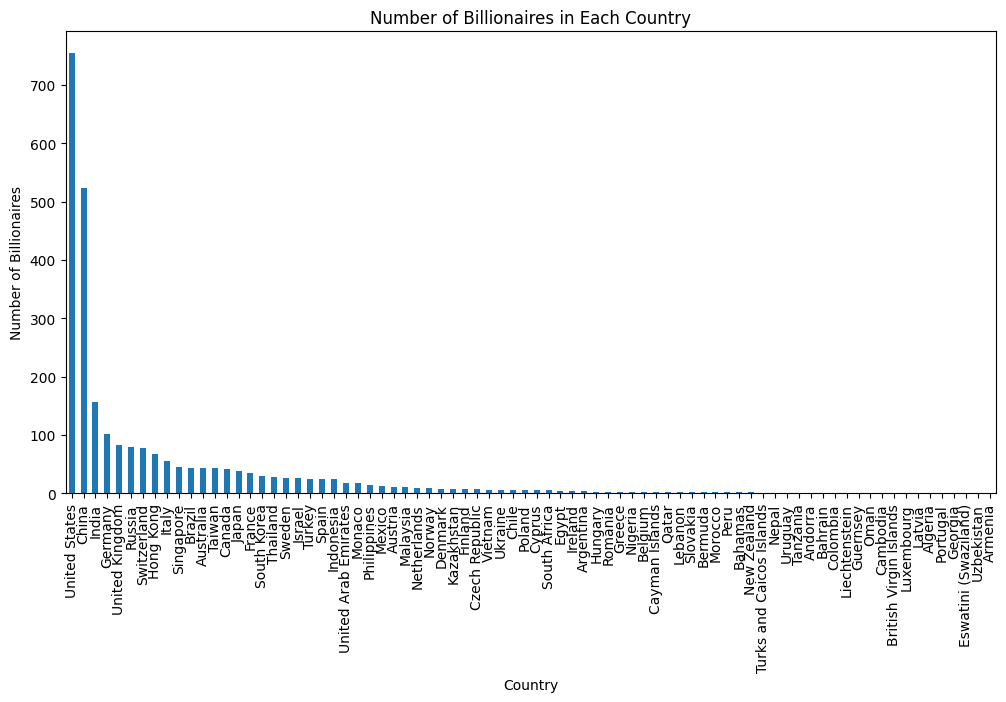

In [15]:
country_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.title('Number of Billionaires in Each Country')
# plt.grid()
plt.show()

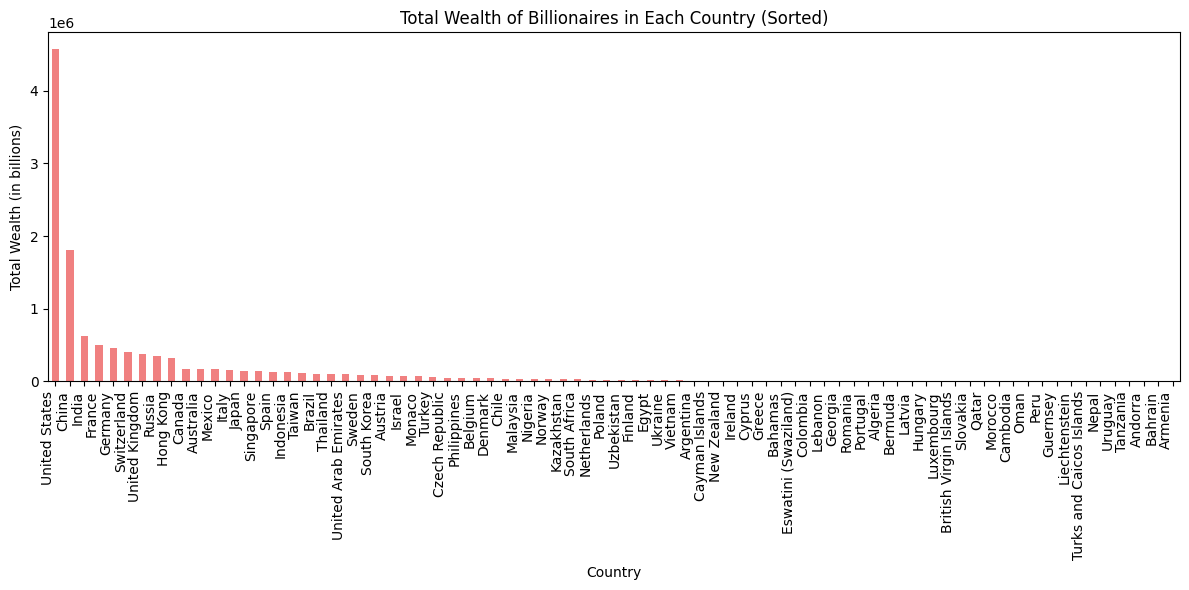

In [35]:
# Group by country and sum the wealth in each country, then sort by total wealth
country_wealth = df.groupby('country')['finalWorth'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
country_wealth.plot(kind='bar', color='lightcoral')
plt.title('Total Wealth of Billionaires in Each Country (Sorted)')
plt.xlabel('Country')
plt.ylabel('Total Wealth (in billions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


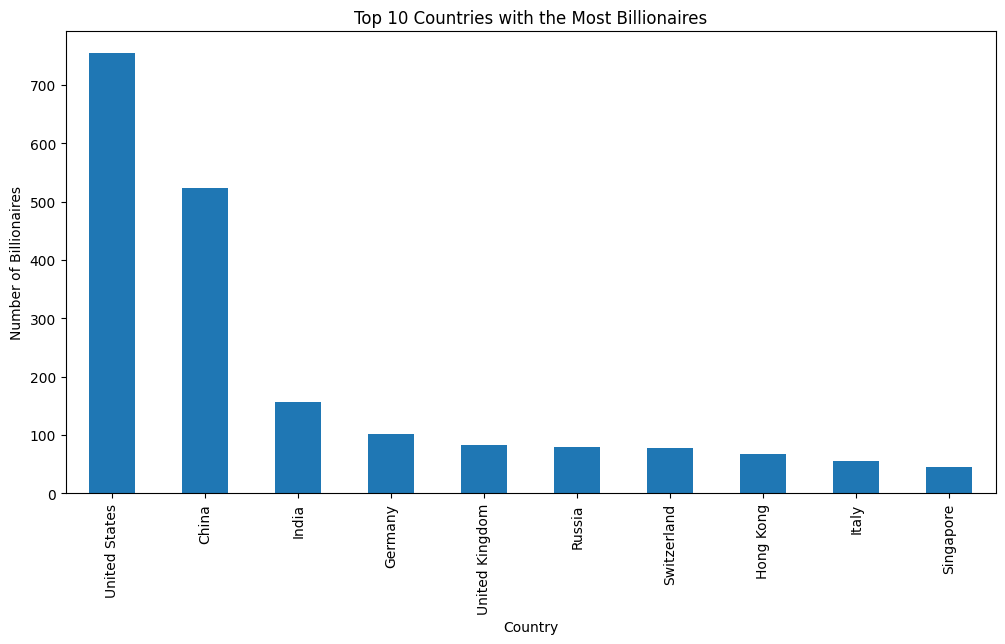

### Number of billionares per city in the USA

In [19]:
# Filter the data for billionaires in the USA
usa_billionaires = df[df['country'] == 'United States']

# Group the data by city and count the number of billionaires in each city
billionaires_per_city = usa_billionaires.groupby('city')['personName'].count().reset_index()

# Sort the data in descending order of the number of billionaires
billionaires_per_city = billionaires_per_city.sort_values(by='personName', ascending=False)

print(billionaires_per_city)


              city  personName
160       New York          99
218  San Francisco          37
132    Los Angeles          34
180     Palm Beach          21
53          Dallas          20
..             ...         ...
117     Lake Worth           1
118          Lanai           1
119      Larchmont           1
121        Leawood           1
267      Ypsilanti           1

[268 rows x 2 columns]


country
United States     754
China             523
India             157
Germany           102
United Kingdom     82
Russia             79
Switzerland        78
Hong Kong          68
Italy              55
Singapore          46
Name: count, dtype: int64


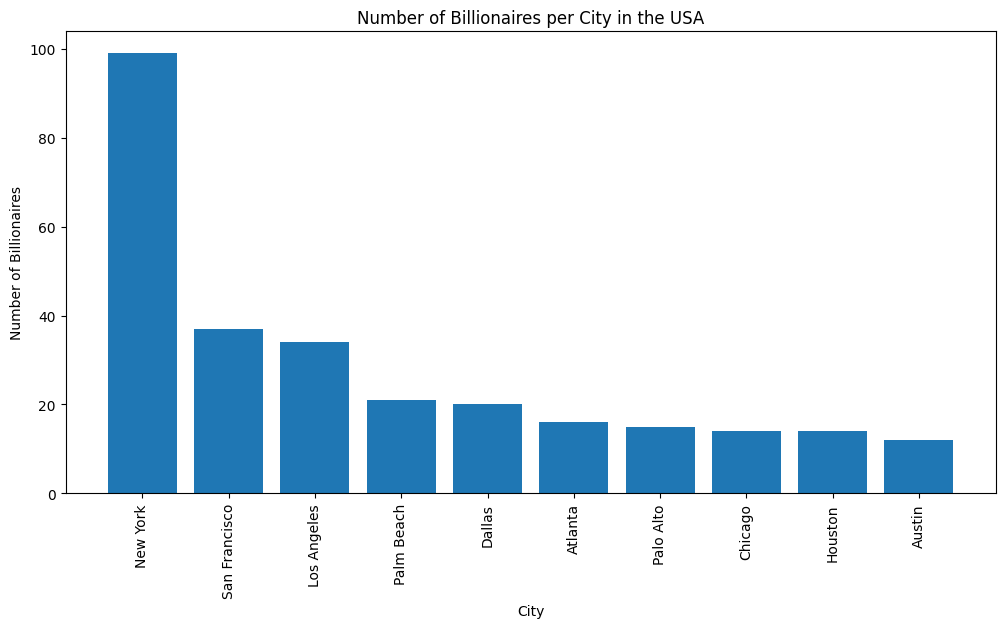

In [21]:
top_10_usa_cities = billionaires_per_city.head(10)
print(top_10_countries)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(top_10_usa_cities['city'], top_10_usa_cities['personName'])
plt.xlabel('City')
plt.ylabel('Number of Billionaires')
plt.title('Number of Billionaires per City in the USA')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


### Correlation between billionare's country's gdp and hil worth

In [25]:
# Clean and convert 'gdp_country' to numeric
df['gdp_country'] = df['gdp_country'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculate the correlation
correlation = df['finalWorth'].corr(df['gdp_country'])

print(f'Correlation between net worth and country GDP: {correlation:.2f}')

Correlation between net worth and country GDP: 0.04


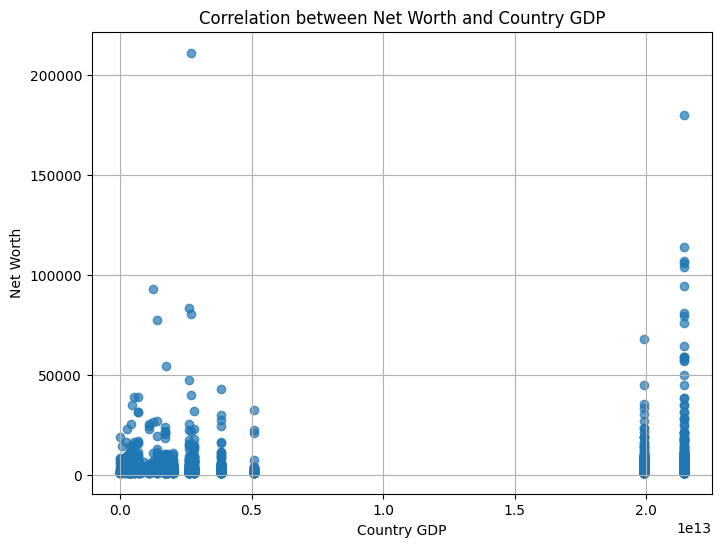

In [26]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['gdp_country'], df['finalWorth'], alpha=0.7)
plt.title('Correlation between Net Worth and Country GDP')
plt.xlabel('Country GDP')
plt.ylabel('Net Worth')
plt.grid(True)

In [27]:
df.head(10)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
5,6,104000,Technology,Bill Gates,67.0,United States,Medina,Microsoft,Technology,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
6,7,94500,Media & Entertainment,Michael Bloomberg,81.0,United States,New York,Bloomberg LP,Media & Entertainment,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
7,8,93000,Telecom,Carlos Slim Helu & family,83.0,Mexico,Mexico City,Telecom,Telecom,Mexico,...,3.6,1.258287e+12,40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784
8,9,83400,Diversified,Mukesh Ambani,65.0,India,Mumbai,Diversified,Diversified,India,...,7.7,2.611000e+12,28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
9,10,80700,Technology,Steve Ballmer,67.0,United States,Hunts Point,Microsoft,Technology,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891


### Number of millionares in every category

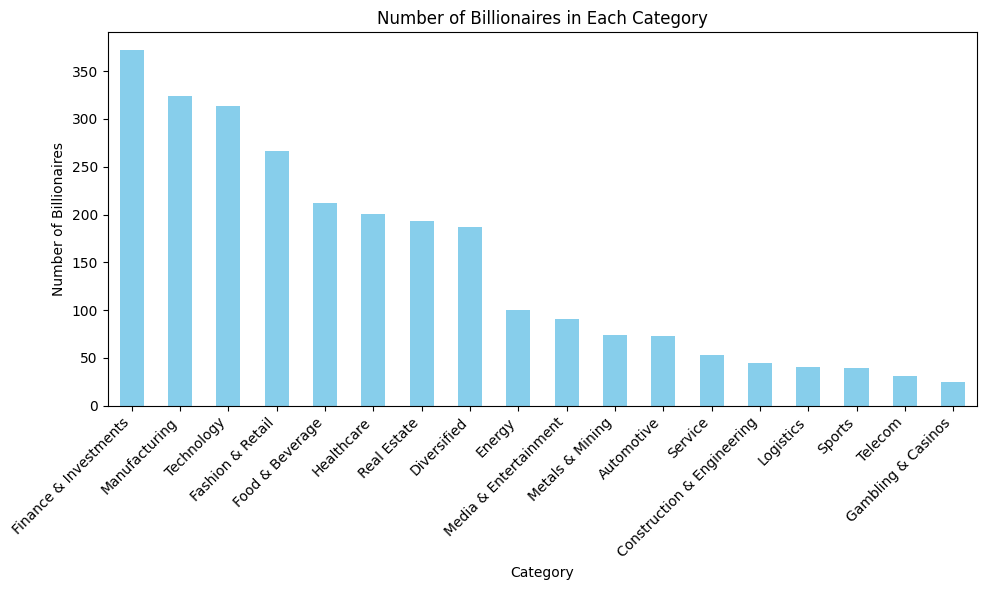

In [28]:
category_counts = df['category'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Billionaires in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Billionaires')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

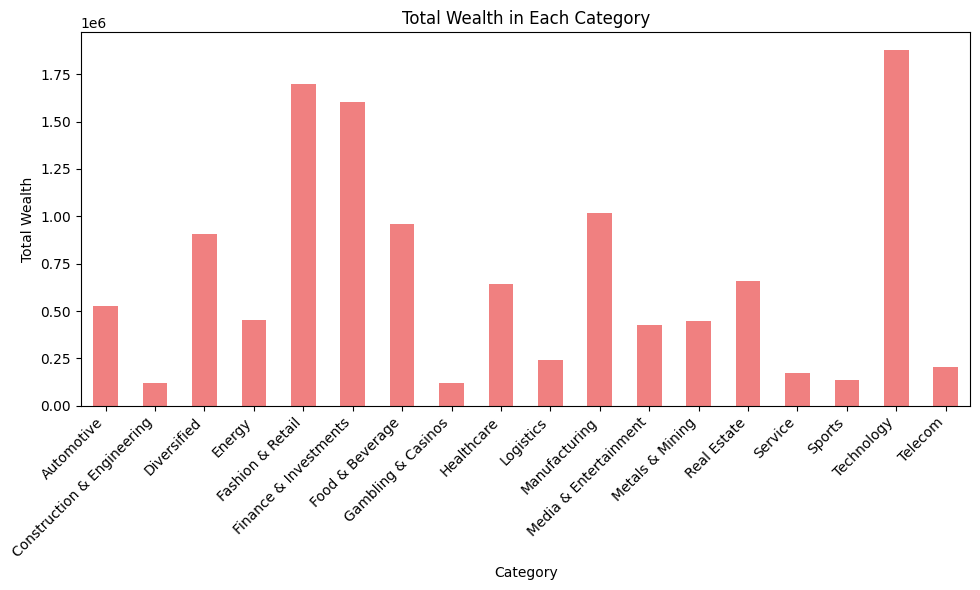

In [29]:
# Group by category and sum the wealth in each category
category_wealth = df.groupby('category')['finalWorth'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_wealth.plot(kind='bar', color='lightcoral')
plt.title('Total Wealth in Each Category')
plt.xlabel('Category')
plt.ylabel('Total Wealth')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

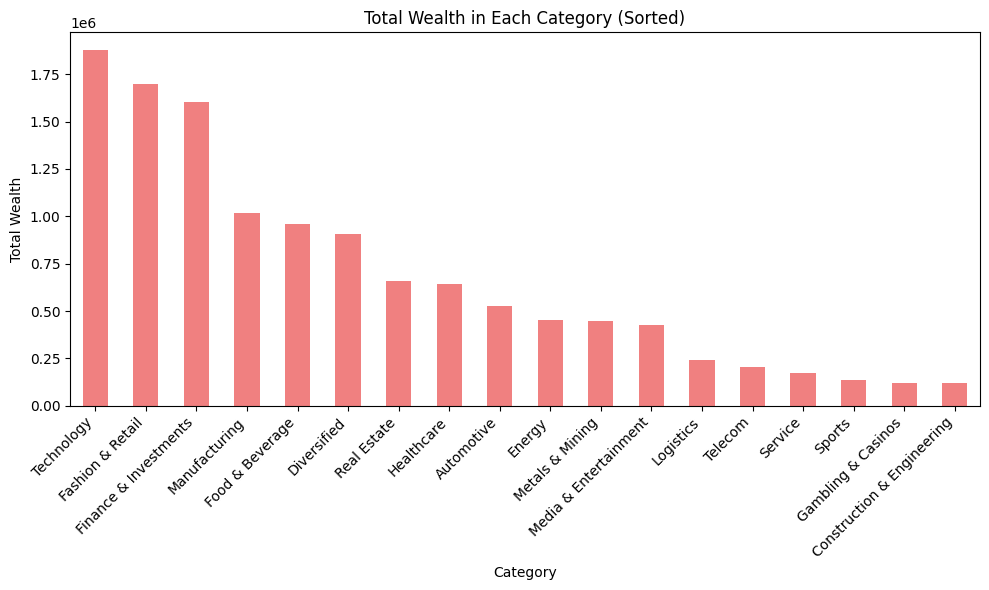

In [30]:
# Group by category and sum the wealth in each category
category_wealth = df.groupby('category')['finalWorth'].sum()

# Sort the categories by wealth in descending order
category_wealth = category_wealth.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
category_wealth.plot(kind='bar', color='lightcoral')
plt.title('Total Wealth in Each Category (Sorted)')
plt.xlabel('Category')
plt.ylabel('Total Wealth')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [63]:
category_counts = df['category'].value_counts()
category_wealth = df.groupby('category')['finalWorth'].sum()


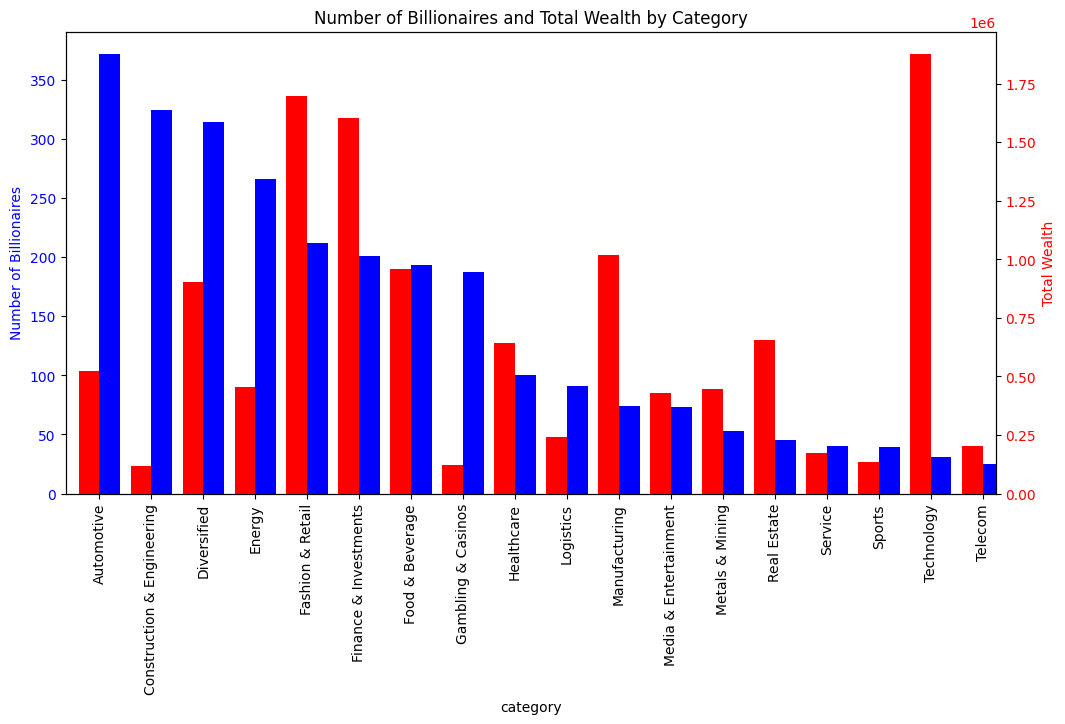

In [64]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis

# Plot the number of billionaires
category_counts.plot(kind='bar', ax=ax1, color='b', width=0.4, position=0, label='Number of Billionaires')
ax1.set_ylabel('Number of Billionaires', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot the total wealth in each category
category_wealth.plot(kind='bar', ax=ax2, color='r', width=0.4, position=1, label='Total Wealth')
ax2.set_ylabel('Total Wealth', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Customize the plot
plt.title('Number of Billionaires and Total Wealth by Category')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')

plt.show()


In [54]:
df.head(10)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
5,6,104000,Technology,Bill Gates,67.0,United States,Medina,Microsoft,Technology,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
6,7,94500,Media & Entertainment,Michael Bloomberg,81.0,United States,New York,Bloomberg LP,Media & Entertainment,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
7,8,93000,Telecom,Carlos Slim Helu & family,83.0,Mexico,Mexico City,Telecom,Telecom,Mexico,...,3.6,1.258287e+12,40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784
8,9,83400,Diversified,Mukesh Ambani,65.0,India,Mumbai,Diversified,Diversified,India,...,7.7,2.611000e+12,28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
9,10,80700,Technology,Steve Ballmer,67.0,United States,Hunts Point,Microsoft,Technology,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891


### Age Distribution and Wealth by age of Billionaires:

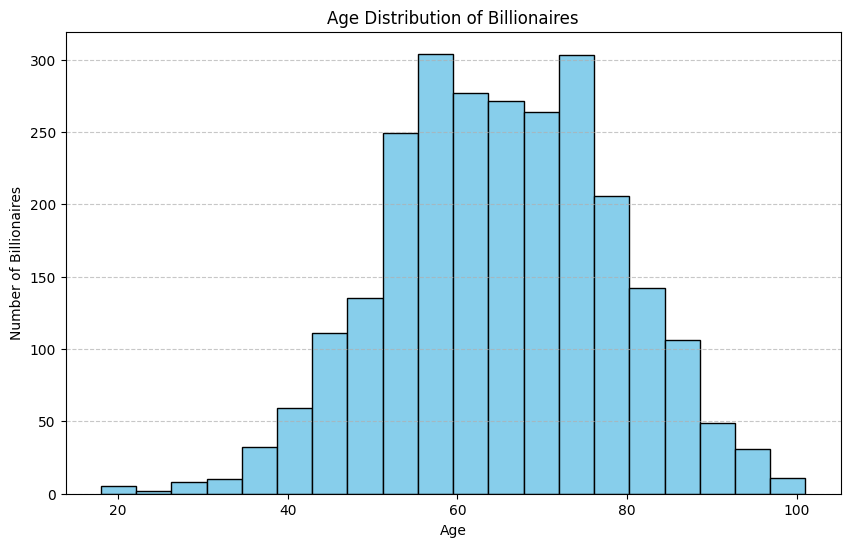

In [55]:
# Create a histogram of billionaires' ages
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Billionaires')
plt.xlabel('Age')
plt.ylabel('Number of Billionaires')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the plot further if needed
# For example, add labels or save the plot to a file

plt.show()

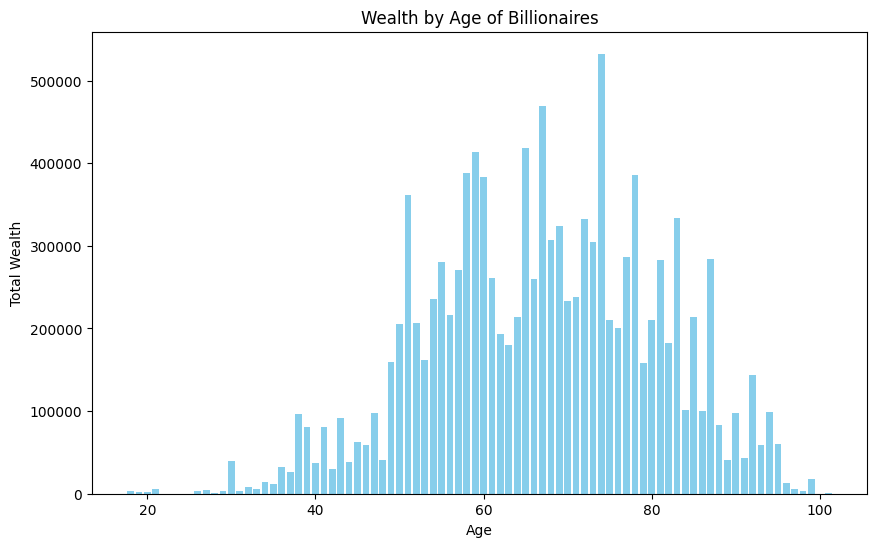

In [59]:
# Group data by age and calculate the total wealth for each age group
age_wealth = df.groupby('age')['finalWorth'].sum()

# Create a bar plot to show wealth by age
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(age_wealth.index, age_wealth.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Total Wealth')
plt.title('Wealth by Age of Billionaires')

# Customize the plot further if needed
# For example, add labels, change colors, or save the plot to a file

plt.show()

### Gender representation of world billionares

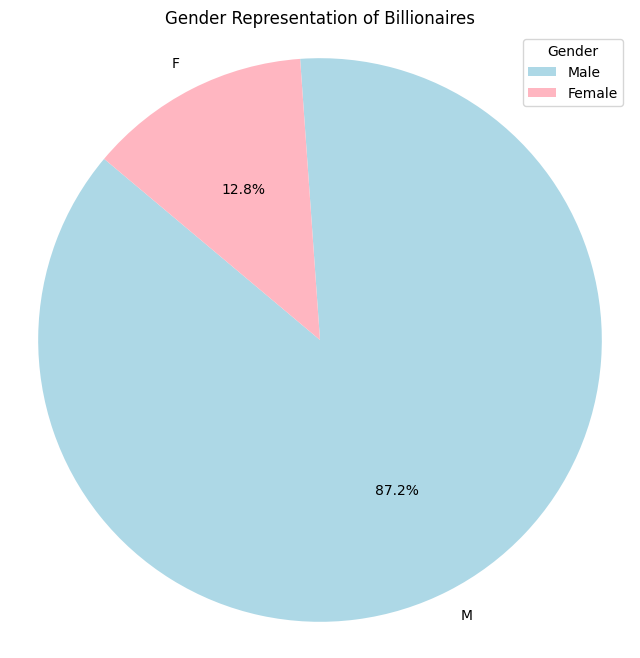

In [56]:
# Count the number of males and females
gender_counts = df['gender'].value_counts()

# Create a pie chart to show gender representation
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('Gender Representation of Billionaires')

# Add a legend and show the plot
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Customize the plot further if needed
# For example, add labels or save the plot to a file

plt.show()

### Billionaires' Birthdays (Not Accurate)

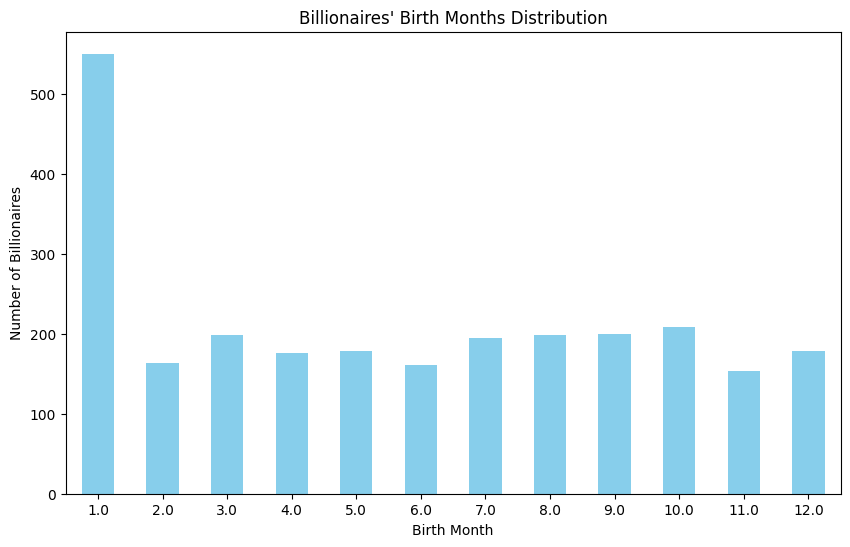

In [60]:
# Count the number of billionaires born in each month
birth_month_counts = df['birthMonth'].value_counts().sort_index()

# Create a bar plot for birth months
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
birth_month_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Birth Month')
plt.ylabel('Number of Billionaires')
plt.title('Billionaires\' Birth Months Distribution')
plt.xticks(rotation=0)  # Customize rotation if needed

plt.show()

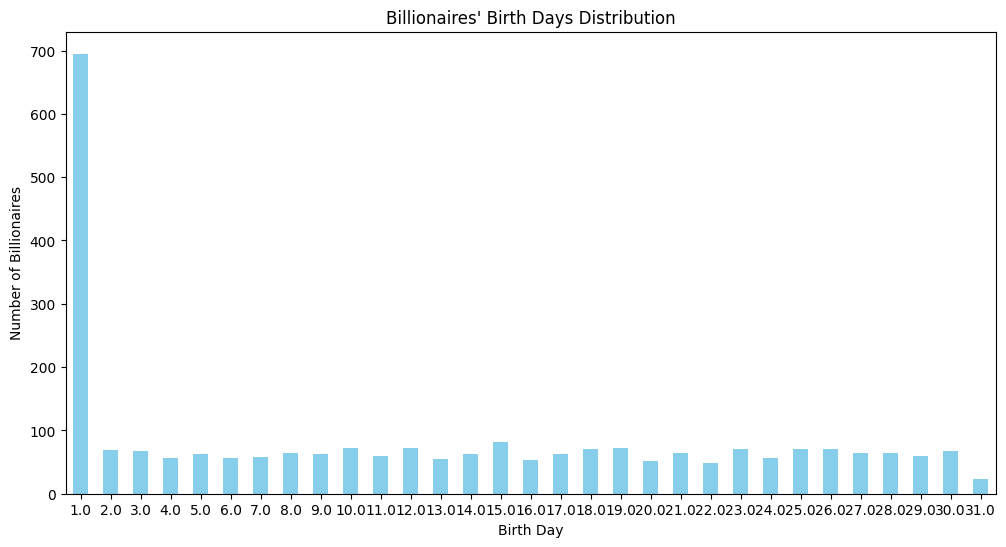

In [61]:
# Count the number of billionaires born on each day
birth_day_counts = df['birthDay'].value_counts().sort_index()

# Create a bar plot for birth days
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
birth_day_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Birth Day')
plt.ylabel('Number of Billionaires')
plt.title("Billionaires' Birth Days Distribution")
plt.xticks(rotation=0)  # Customize rotation if needed

plt.show()

### Population and Billionaires correlation

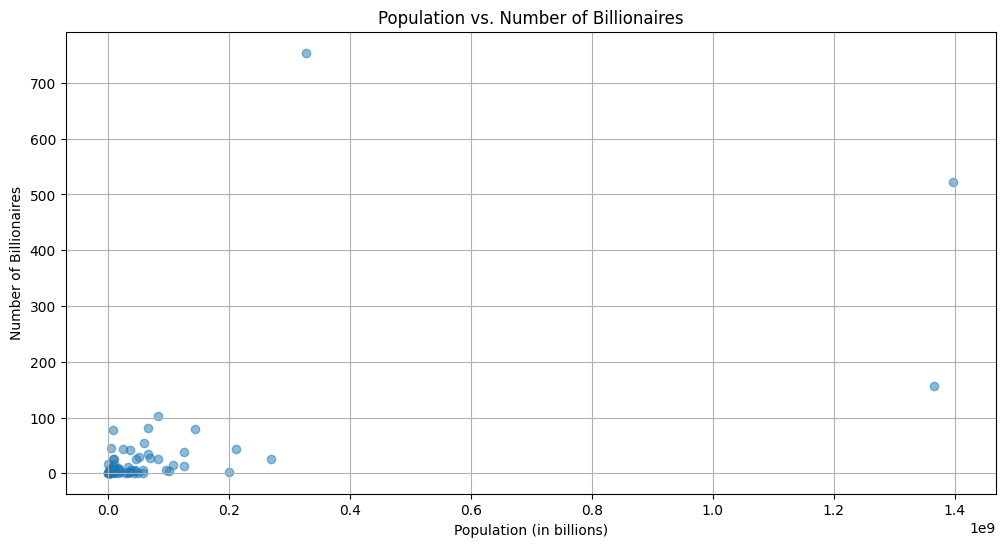

In [62]:
# Group by country and calculate the number of billionaires in each country
billionaires_by_country = df['country'].value_counts()

# Group by country and extract the population of each country
population_by_country = df.groupby('country')['population_country'].max()

# Create a new DataFrame for the scatter plot
scatter_data = pd.DataFrame({'Population': population_by_country, 'Number of Billionaires': billionaires_by_country})

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Scatter plot
plt.scatter(scatter_data['Population'], scatter_data['Number of Billionaires'], alpha=0.5)
plt.xlabel('Population (in billions)')
plt.ylabel('Number of Billionaires')
plt.title('Population vs. Number of Billionaires')
plt.grid()

plt.show()
